In [1]:
import glob
import os
import warnings
import scanpy as sc
import pandas as pd
from matplotlib.pyplot import rc_context
import matplotlib.pyplot as plt

In [2]:
warnings.simplefilter(action="ignore",category=Warning)
sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi=80)

In [3]:
workpath = "/home/maomin/material/JupyterLabworkspace/BreastCancer/GSE161529/"

In [4]:
df = pd.read_csv(workpath + "information.csv")
df

,ID,cancer type,cell population,gender,menopause,number of cells,parity,patient
0,GSM4909253,Normal,Total,Female,Pre,4966,Nulliparous,92.00
1,GSM4909254,Normal,Total,Female,Pre,7130,Nulliparous,19.00
2,GSM4909257,Normal,Total,Female,Pre,7412,Nulliparous,93.00
3,GSM4909261,Normal,Total,Female,Pre,3443,Nulliparous,230.17
4,GSM4909263,Normal,Total,Female,Pre,1678,Nulliparous,64.00
5,GSM4909265,Normal,Total,Female,Pre,5665,Parous,233.00
6,GSM4909266,Normal,Total,Female,Pre,4605,Parous,169.00
7,GSM4909268,Normal,Total,Female,Pre,7371,Parous,123.00
8,GSM4909270,Normal,Total,Female,Post,10178,Nulliparous,342.00
9,GSM4909271,Normal,Total,Female,Post,2320,Nulliparous,288.00


In [5]:
path = "/home/maomin/material/scRNABreast/RAW/GSE161529_RAW/"

In [6]:
index = df['ID'].to_list()

In [ ]:
adlist = []
for i in index:
    file = path + i + '/filtered_feature_bc_matrix/'
    adata = sc.read_10x_mtx(file,var_names= "gene_symbols",cache=True)
    adata.var_names_make_unique()
    adata.obs_names_make_unique()
    adata.obs.index  = i +'_' + adata.obs.index
    adata.obs['ID'] = i
    adata.obs['tissue'] = df[df["ID"] == i]["cancer type"].to_list()[0]
    if "Normal" in df[df["ID"] == i]["cancer type"].to_list()[0]:
        sample_type = 'Normal'
    elif 'tumour' in df[df["ID"] == i]["cancer type"].to_list()[0]:
        sample_type = 'Tumor'
    adata.obs['type'] = sample_type
    adata.obs['menopause'] = df[df["ID"] == i]["menopause"].to_list()[0]
    adlist.append(adata)

... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedu

In [28]:
import scrublet as scr

In [29]:
def doublet(ad):
    scrub = scr.Scrublet(ad.X, expected_doublet_rate=0.06)
    out = scrub.scrub_doublets(min_counts=2, min_cells=3, min_gene_variability_pctl=85, n_prin_comps=40)
    scrdf = pd.DataFrame({'scr_score': out[0], 'scr_pred': out[1]}, index=ad.obs.index)
    ad.obs = pd.concat([ad.obs, scrdf], axis=1)
    return(ad)

In [32]:
for i in list(range(len(index))):
    adlist[i] = doublet(adlist[i])

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.58
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 4.3%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 4.7%
Elapsed time: 9.3 seconds
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.33
Detected doublet rate = 1.2%
Estimated detectable doublet fraction = 22.2%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 5.2%
Elapsed time: 14.7 seconds
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.30
Detected doublet rate = 1.4%
Estimated detectable doublet fraction = 22.9%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 6.1%
Elapsed time: 14.5 seconds
Preprocessing...
Simulating doublets

In [33]:
adata = sc.concat(adlist,axis=0)

In [34]:
def basic_qc(adata):
    ### 线粒体
    adata.var['mt'] = adata.var_names.str.startswith('MT-')
    sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
    ### 核糖体
    adata.var['rp'] = [True if i.startswith('RPL') or i.startswith('RPS') else False for i in adata.var_names]
    sc.pp.calculate_qc_metrics(adata, qc_vars=['rp'], percent_top=None, log1p=False, inplace=True)
    ### 血细胞
    adata.var['hb'] = [True if i.startswith('HB') and not i.startswith('HBP') else False for i in adata.var_names]
    sc.pp.calculate_qc_metrics(adata, qc_vars=['hb'], percent_top=None, log1p=False, inplace=True)
    return(adata)

In [35]:
adata = basic_qc(adata)

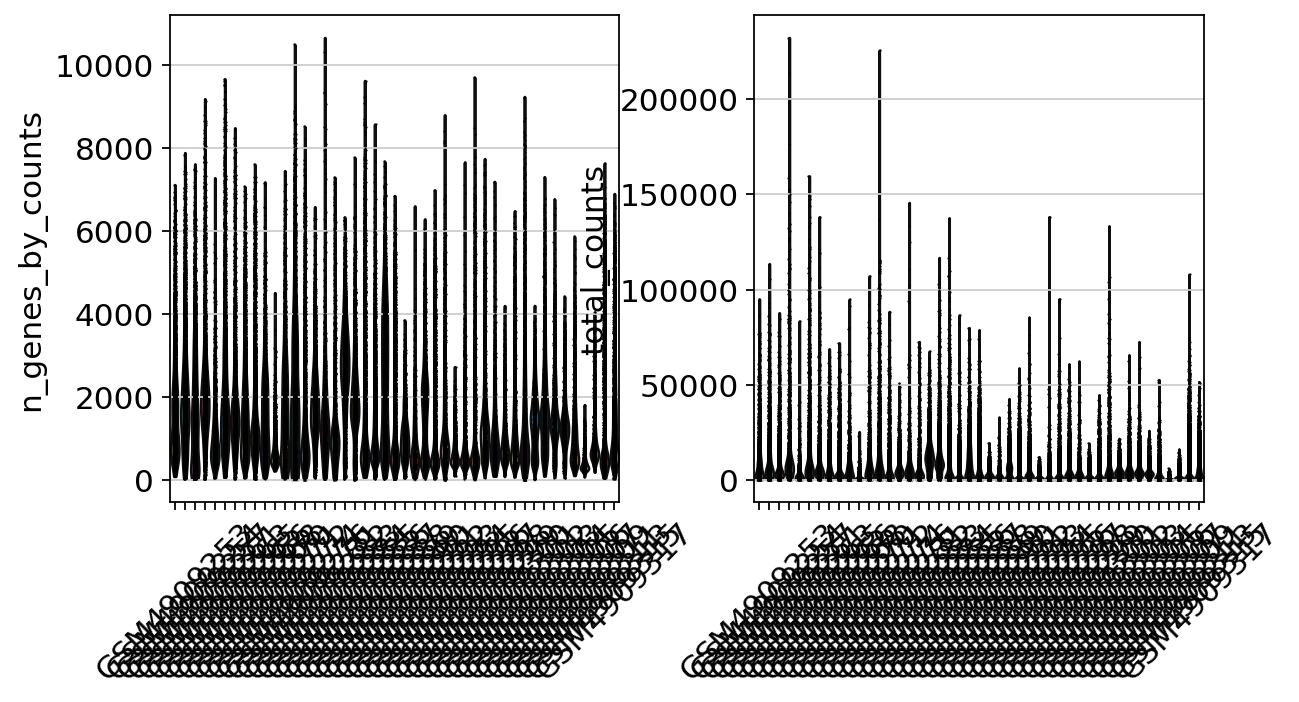

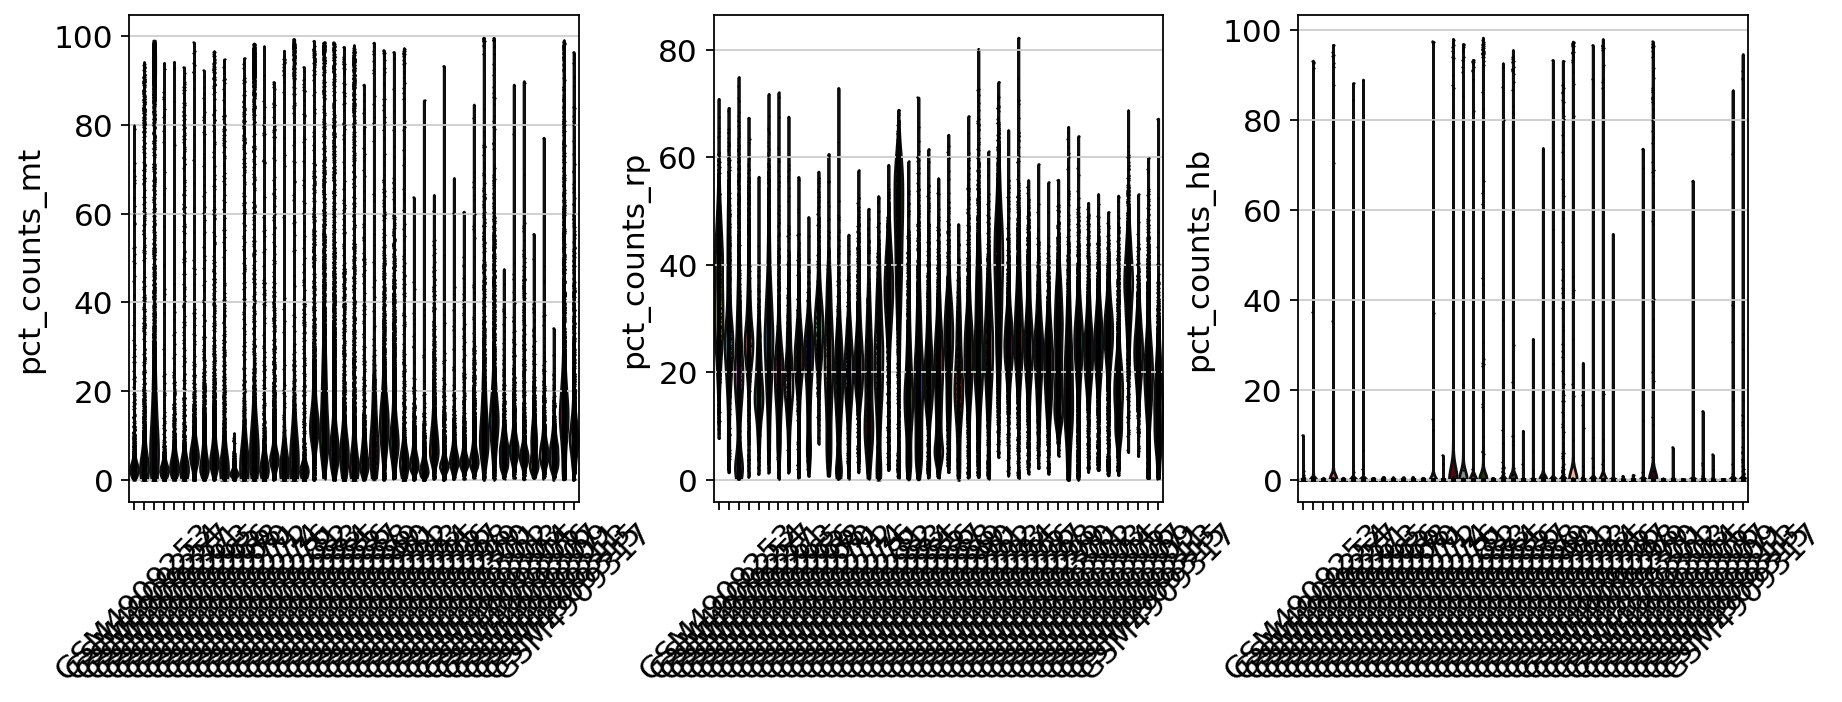

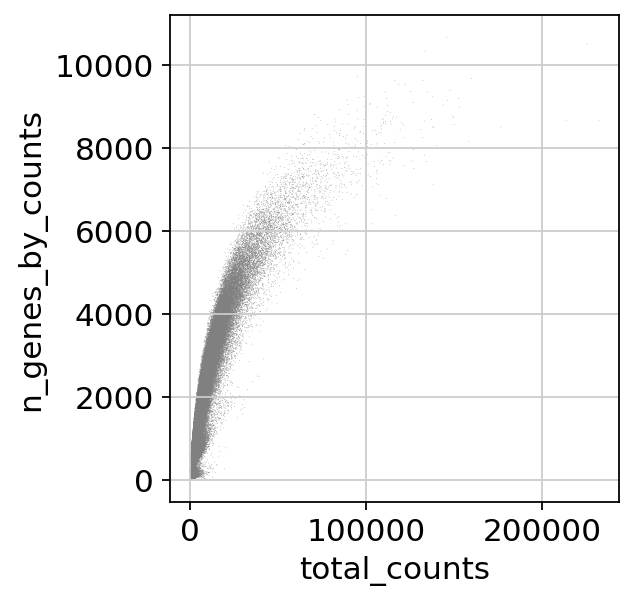

normalizing counts per cell
    finished (0:00:03)


<Axes: xlabel='% of total counts'>

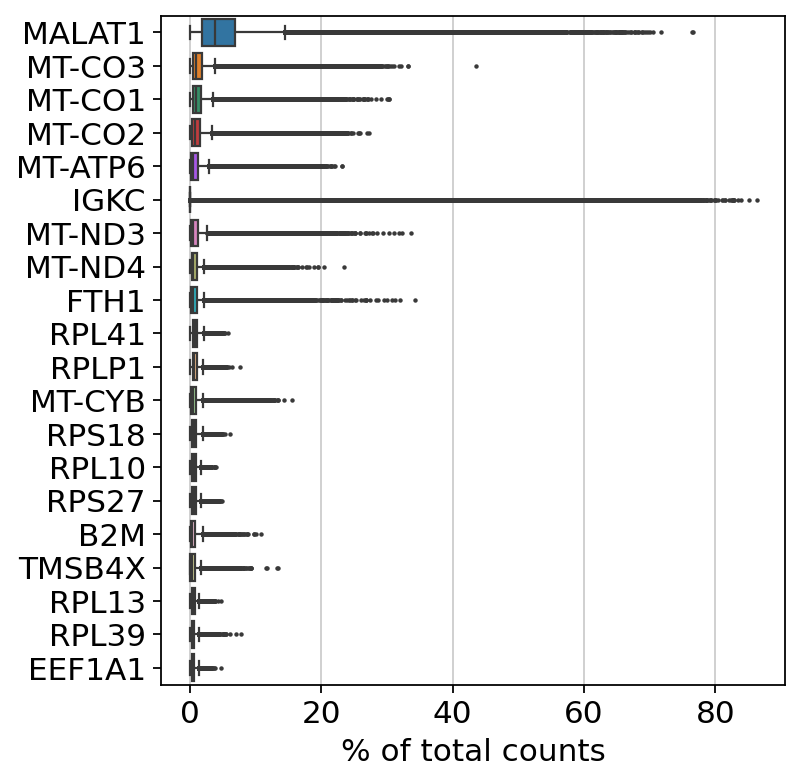

In [36]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts'],rotation= 45,groupby = 'ID', show = False)
sc.pl.violin(adata,keys=['pct_counts_mt','pct_counts_rp','pct_counts_hb'],rotation= 45,groupby='ID')
sc.pl.scatter(adata,x='total_counts', y='n_genes_by_counts')
sc.pl.highest_expr_genes(adata,n_top=20,show = False)

In [37]:
adata = adata[adata.obs.n_genes_by_counts < 7000, :]
adata = adata[adata.obs.pct_counts_mt < 20, :]
data = adata[adata.obs.pct_counts_hb <1, :]
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

filtered out 906 cells that have less than 200 genes expressed
filtered out 4694 genes that are detected in less than 3 cells


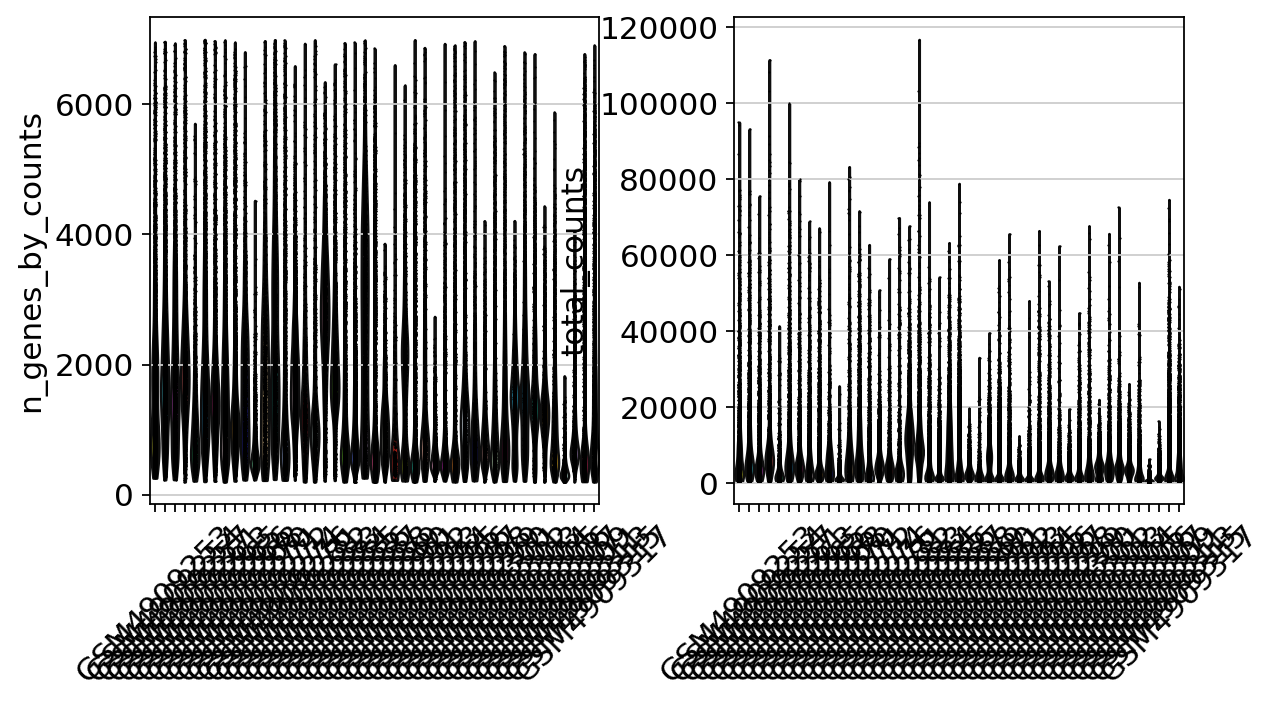

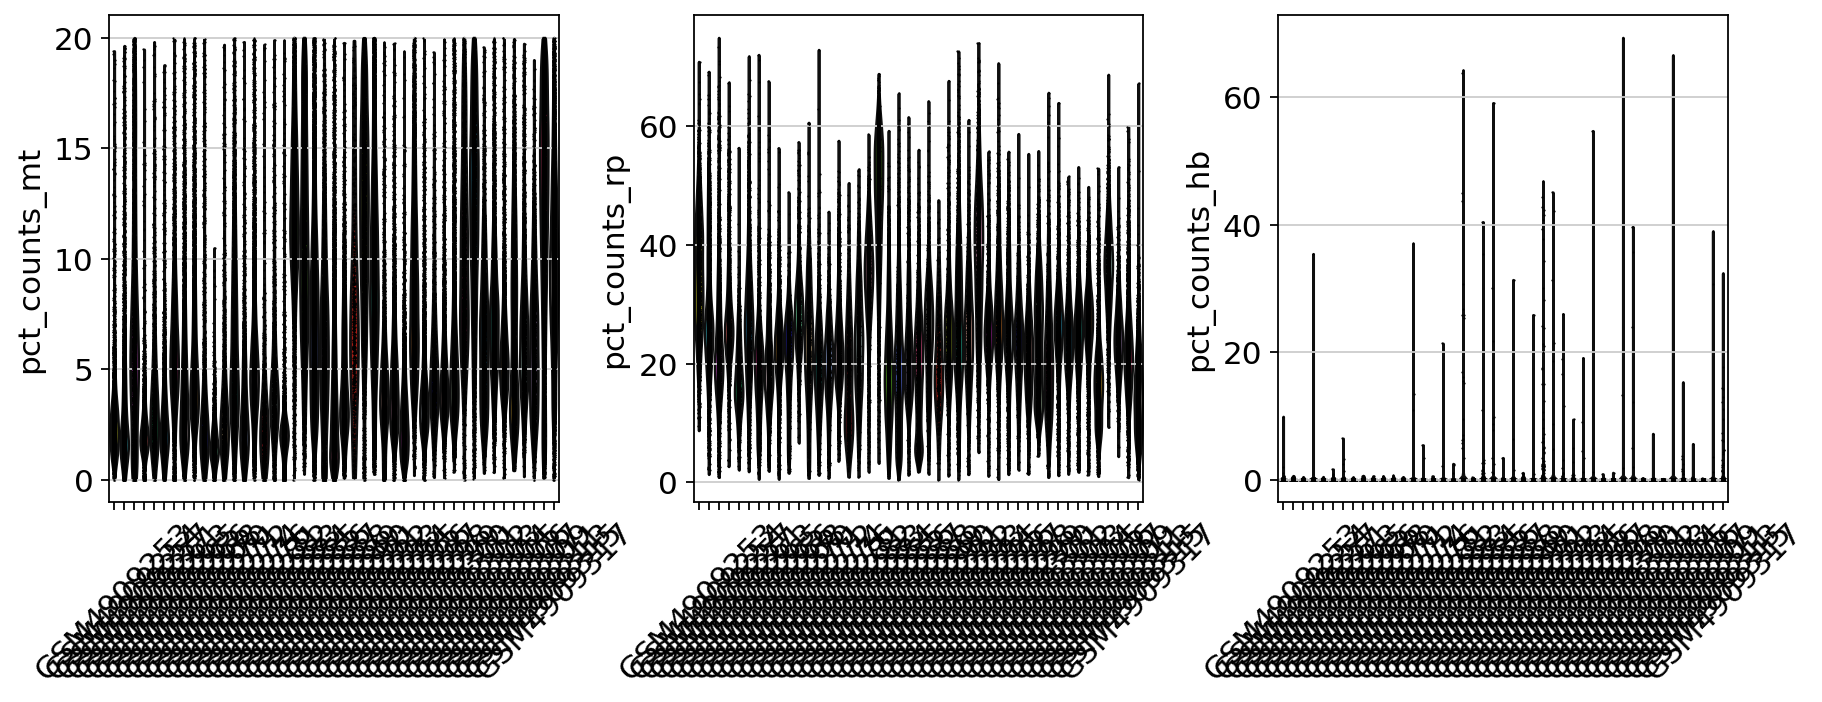

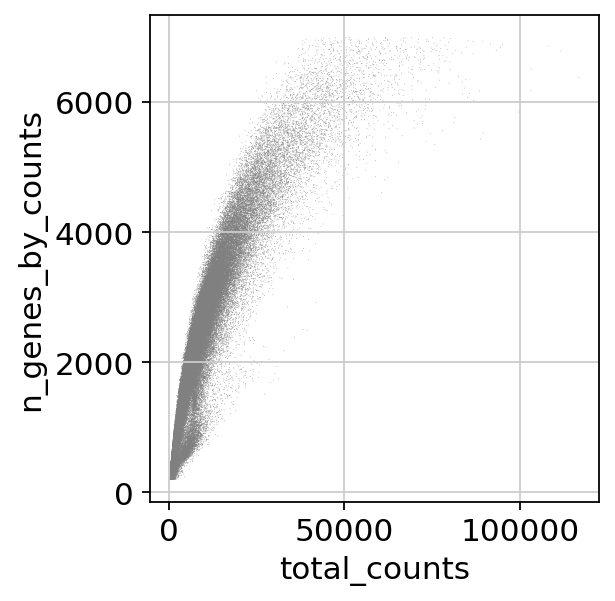

normalizing counts per cell
    finished (0:00:02)


<Axes: xlabel='% of total counts'>

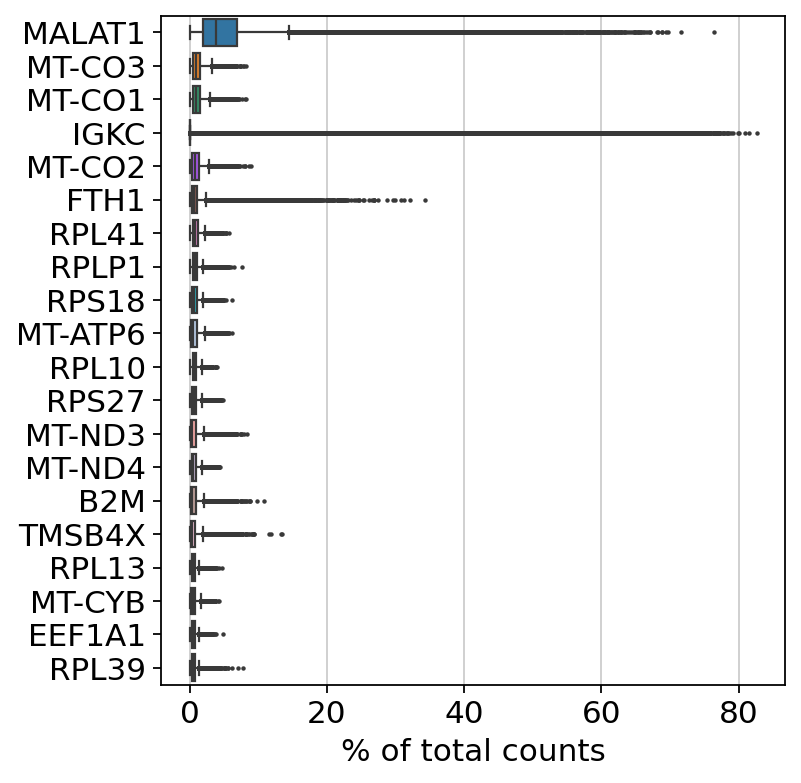

In [38]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts'],rotation= 45,groupby = 'ID', show = False)
sc.pl.violin(adata,keys=['pct_counts_mt','pct_counts_rp','pct_counts_hb'],rotation= 45,groupby='ID')
sc.pl.scatter(adata,x='total_counts', y='n_genes_by_counts')
sc.pl.highest_expr_genes(adata,n_top=20,show = False)

In [39]:
adata

AnnData object with n_obs × n_vars = 266862 × 28844
    obs: 'ID', 'tissue', 'type', 'menopause', 'scr_score', 'scr_pred', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rp', 'pct_counts_rp', 'total_counts_hb', 'pct_counts_hb', 'n_genes'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'rp', 'hb', 'n_cells'
    uns: 'ID_colors'

In [40]:
adata.write_h5ad(workpath + "Result/01adata_qc.h5ad", compression="gzip")